In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
precision_matrices = torch.load("precision_matrices_fp32.pt")

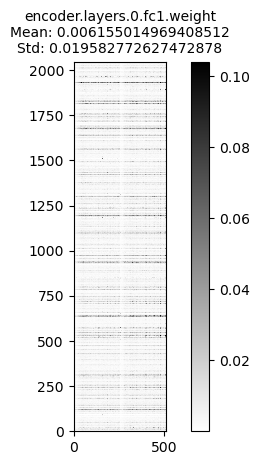

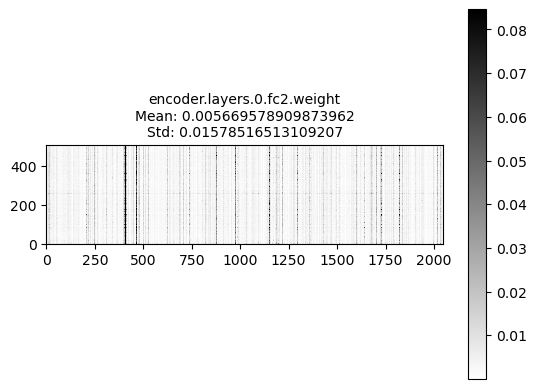

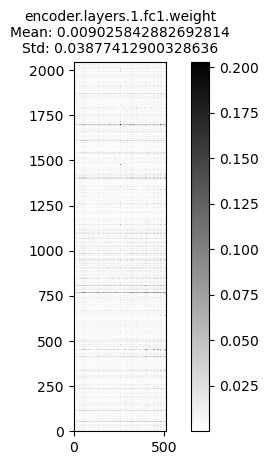

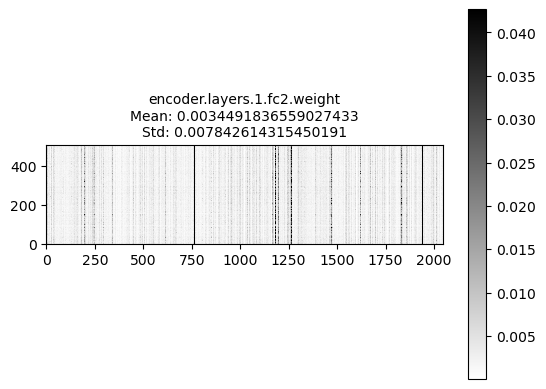

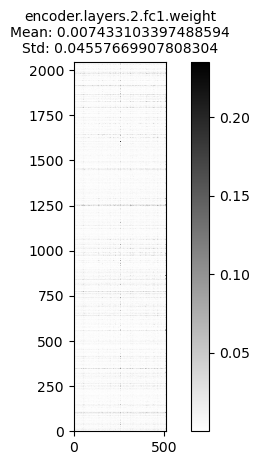

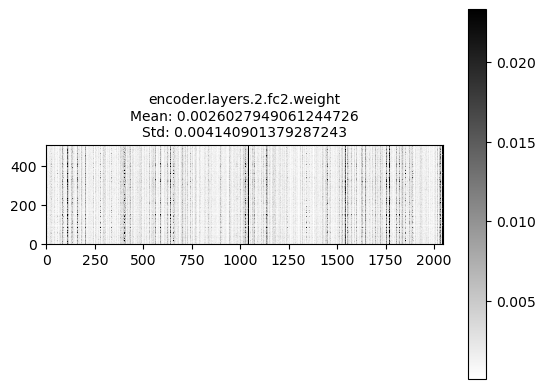

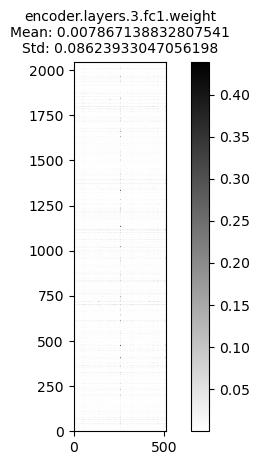

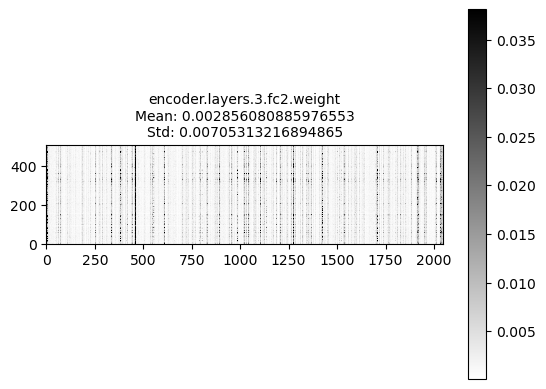

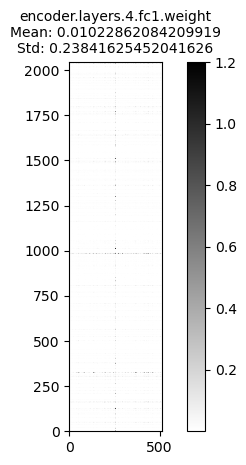

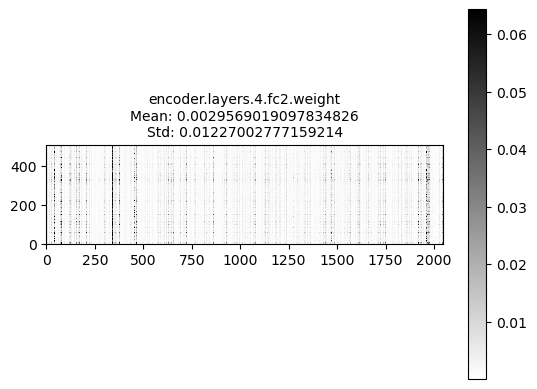

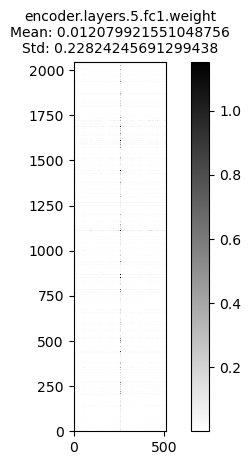

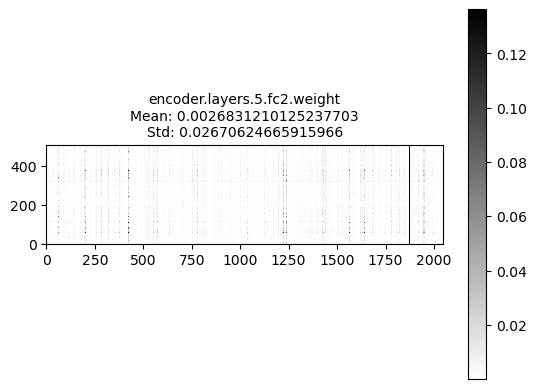

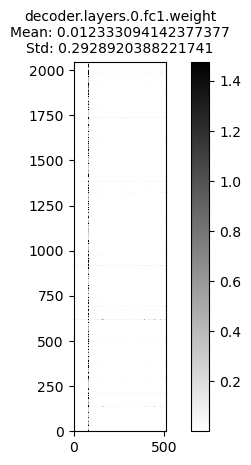

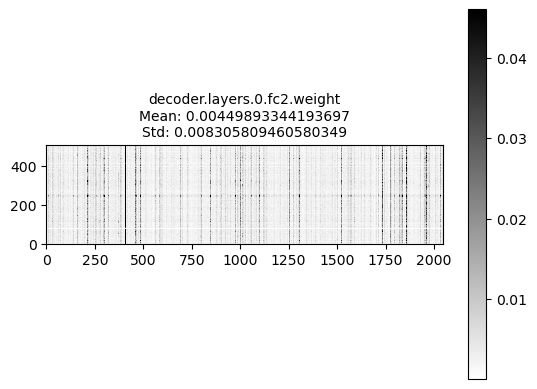

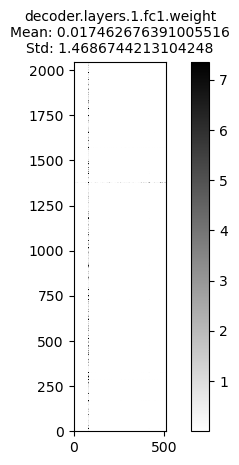

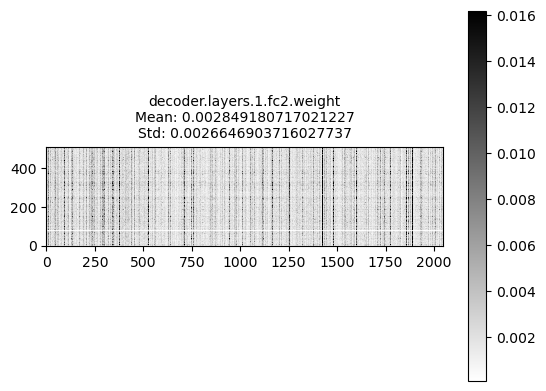

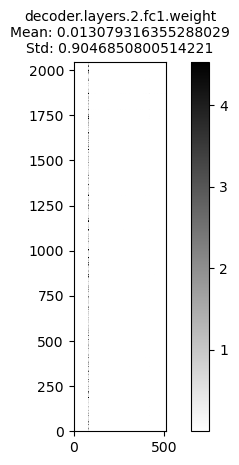

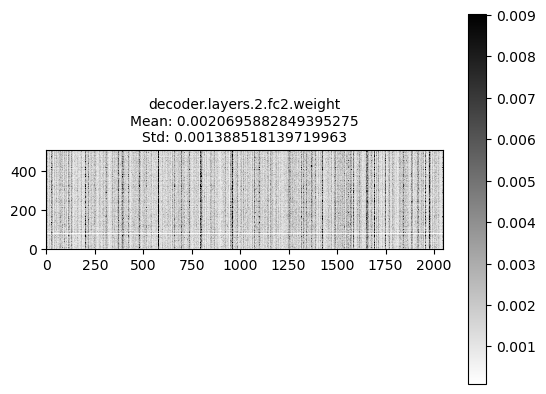

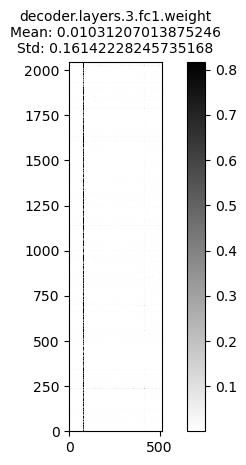

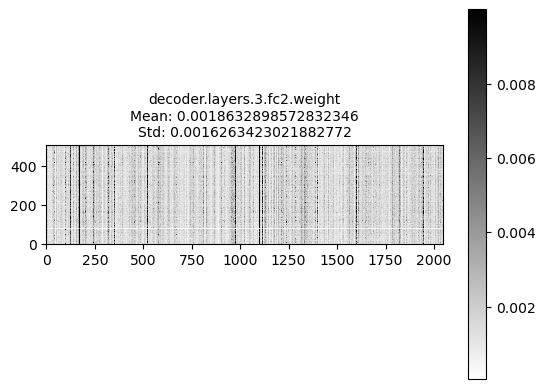

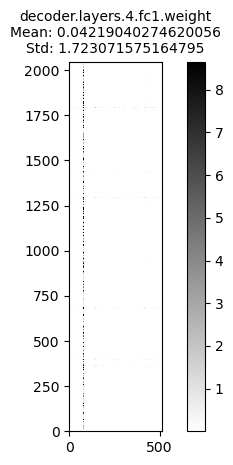

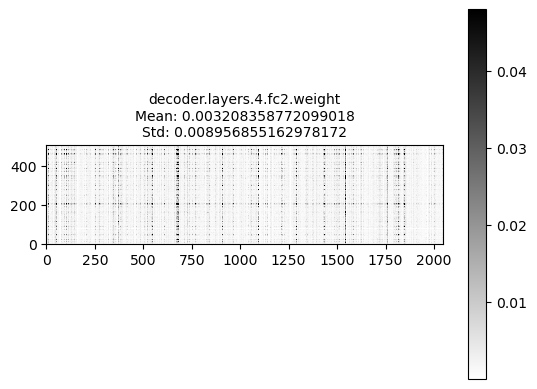

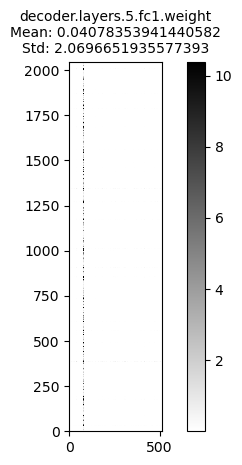

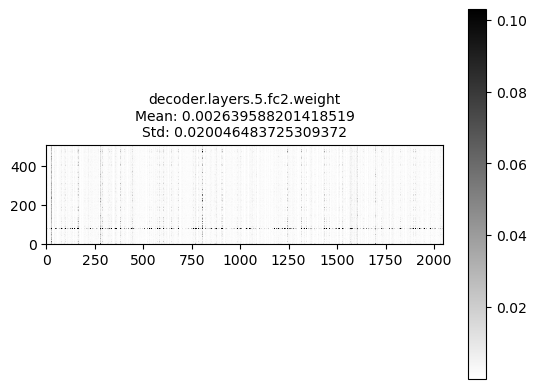

In [3]:
for n, p in precision_matrices.items():
    if n.endswith("fc1.weight") or n.endswith("fc2.weight"):
        p = p.cpu().numpy()
        pixel_plot = plt.imshow(
            p, 
            cmap='gray_r', 
            interpolation='nearest', 
            origin='lower', 
            vmax=p.mean()+5*p.std(), 
            vmin=p.min()
        )
        plt.colorbar(pixel_plot)
        plt.title(f"{n}\nMean: {p.mean()}\nStd: {p.std()}", fontsize=10)
        plt.show()